# Price Prediction using Regression
Building a regression model to predict the price of diamonds

## Data Loading

In [3]:
import pandas as pd

df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 11)

## Data Preprocessing
Steps involved in Data Preprocessing
- Data cleaning
- Identifying and removing outliers
- Encoding categorical variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
# Remove Unnamed column
df = df.drop(["Unnamed: 0"], axis=1)

In [7]:
# Get to know the data better
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


*Note: Notice how there are 0s in "x", "y", "z" values which means they are faulty data*

In [8]:
# Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [9]:
df.shape

(53920, 10)

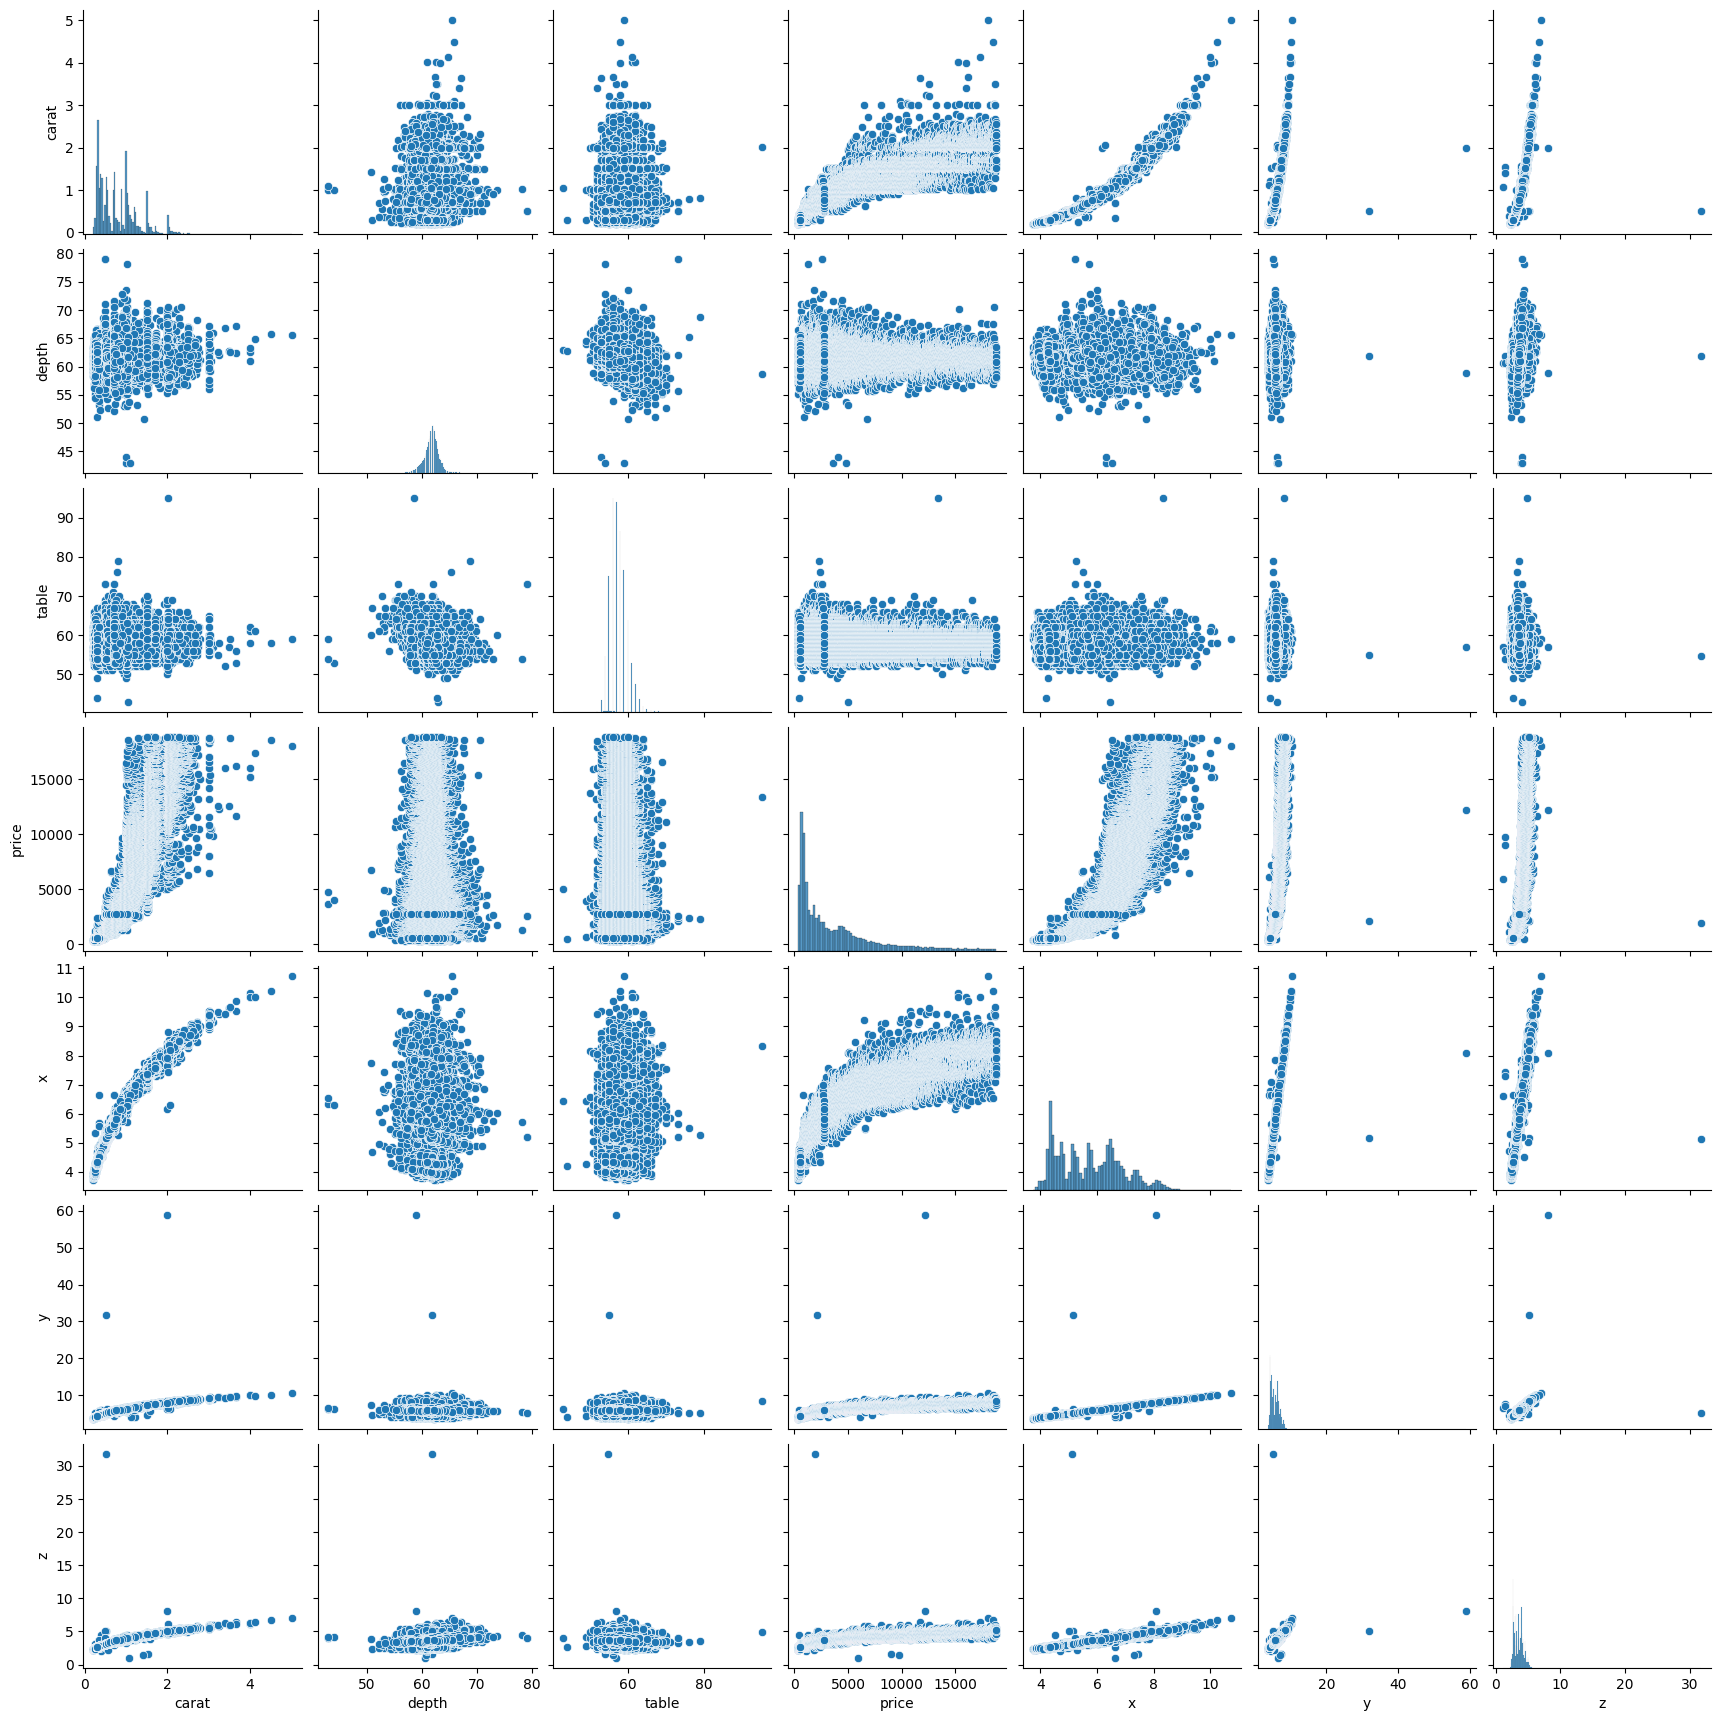

In [10]:
import seaborn as sns

sns.pairplot(df)

### Closer look on data with outliers

In [11]:
import seaborn as sns

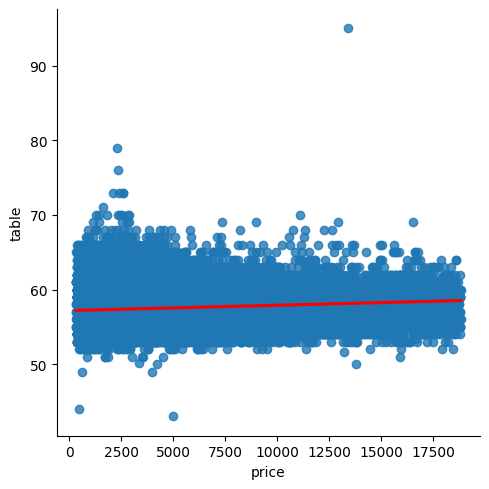

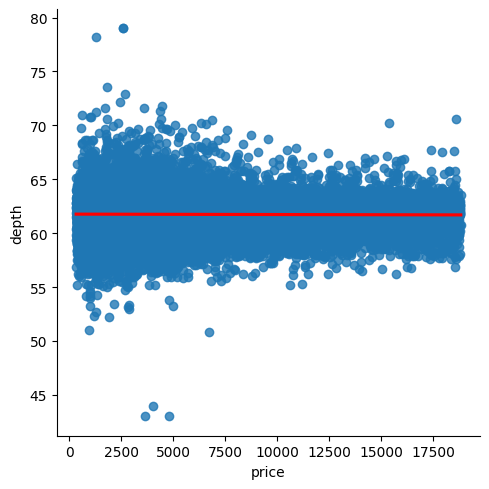

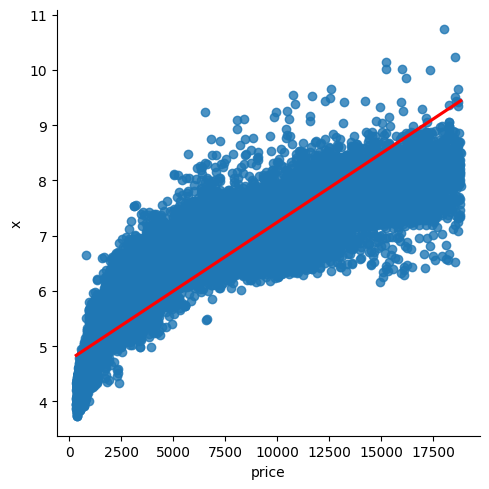

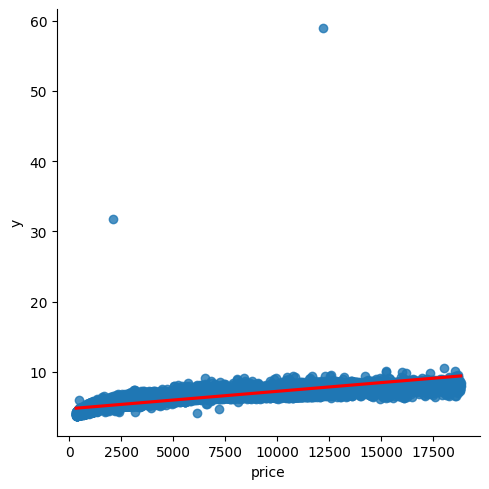

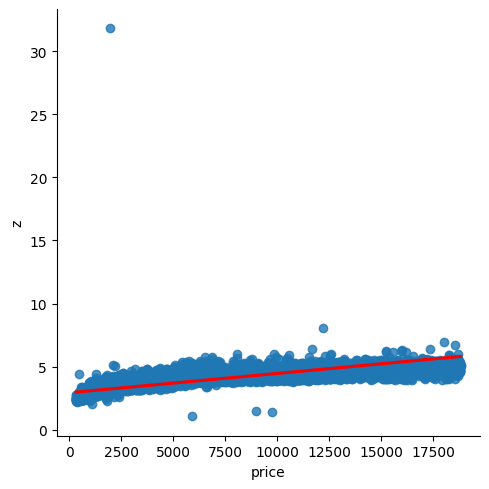

In [12]:
import seaborn as sns

sns.lmplot(x='price', y='table', data=df, line_kws={'color': 'red'})
sns.lmplot(x='price', y='depth', data=df, line_kws={'color': 'red'})
sns.lmplot(x='price', y='x', data=df, line_kws={'color': 'red'})
sns.lmplot(x='price', y='y', data=df, line_kws={'color': 'red'})
sns.lmplot(x='price', y='z', data=df, line_kws={'color': 'red'})

In [13]:
# # Dropping outliers
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["y"]<20)]
df = df[(df["z"]<10)&(df["z"]>2)]

In [14]:
df.shape

(53907, 10)

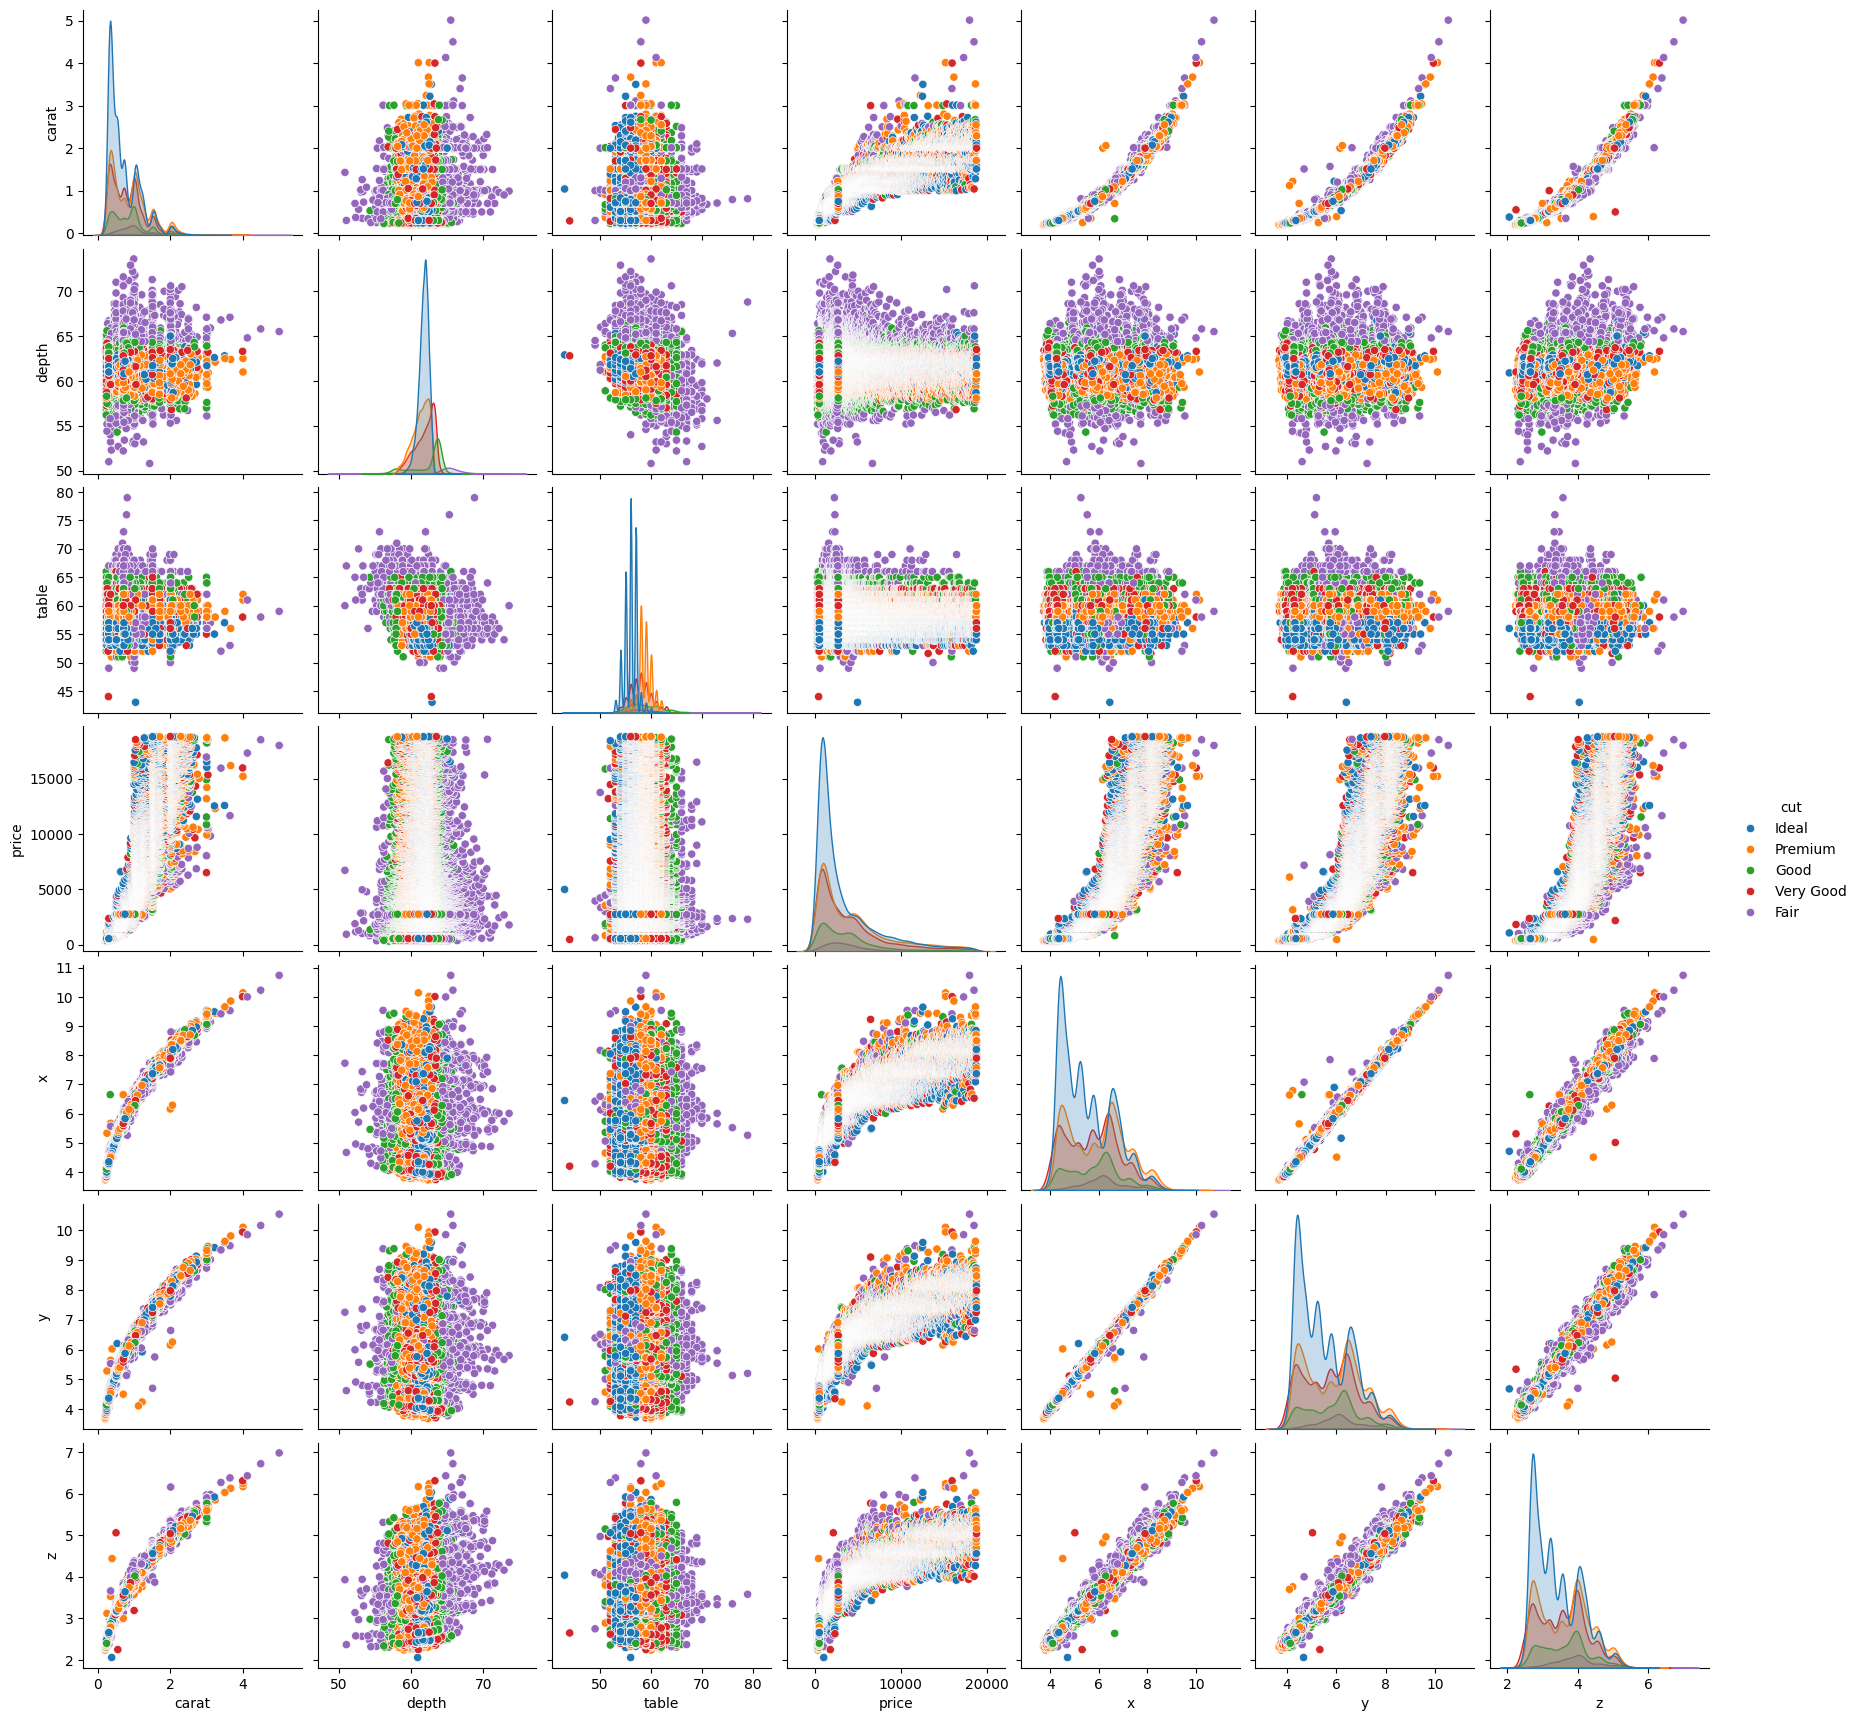

In [15]:
ax = sns.pairplot(df, hue="cut")

Now that the dataset is cleaned, we will deal with the categorical variables

In [16]:
# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


<Axes: xlabel='clarity', ylabel='price'>

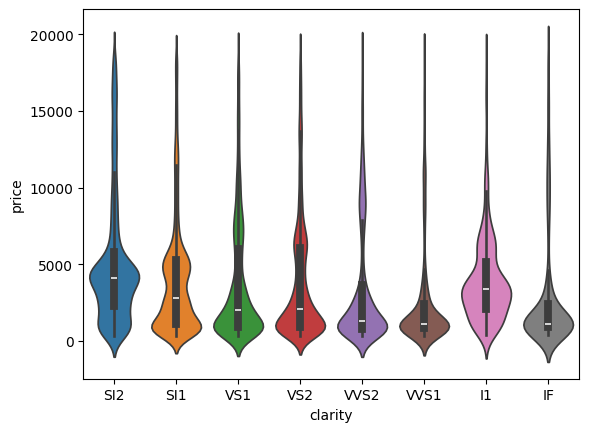

In [17]:
import seaborn as sns

sns.violinplot(x='clarity', y='price', data=df, hue="clarity")

In [18]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

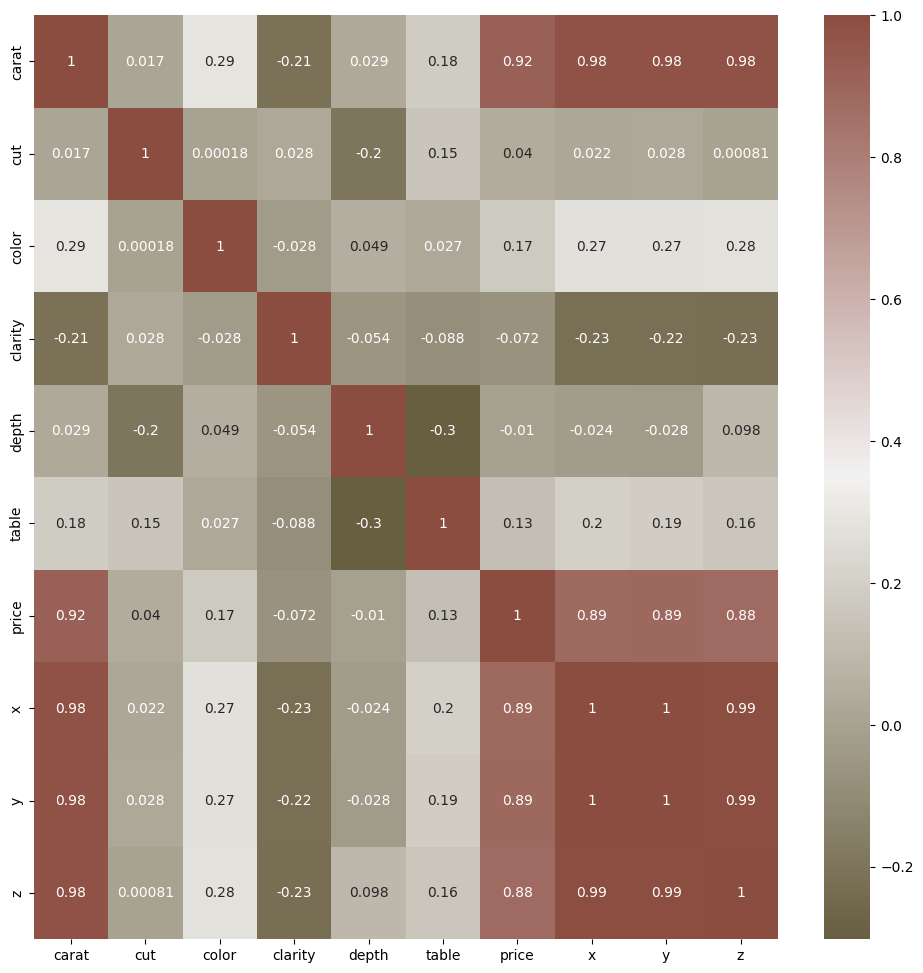

In [20]:
from matplotlib import pyplot as plt
# Correlation matrix

cmap = sns.diverging_palette(70, 20, s=50, l=40, n=6, as_cmap=True)
corrmat = label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, cmap=cmap, annot=True)

## Model Building
Steps involved in Model Building
- Setting up features and target
- Build a pipeline of standard scalar and model for five different regressors
- Fit all the models on training data
- Get mean of cross-validation on the training set for all the models for negative root mean square error (RMSE)
- Pick the model with the best cross-validation score
- Fit the best model on the training set

In [21]:
from sklearn.model_selection import train_test_split
# Assigning features as X and target as Y
X = label_data.drop(["price"], axis=1)
y = label_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3, random_state=42)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


# Building pipelines of standard scaler and model for vaious regressors

pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                        ("lr_classifier", LinearRegression())])

pipeline_dt = Pipeline([("scalar2", StandardScaler()),
                        ("dt_classifier", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scalar3", StandardScaler()),
                        ("rd_classifier", RandomForestRegressor())])

pipeline_kn = Pipeline([("scalar4", StandardScaler()),
                        ("rf_classifier", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar5", StandardScaler()),
                         ("rf_classifier", XGBRegressor())])

In [31]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "LinearRegression",
    1: "DecisionTree",
    2: "RandomForest",
    3: "KNeighbors",
    4: "XGBRegressor"
}

In [32]:
from sklearn.model_selection import cross_val_score

cv_results_rms = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1340.755205 
DecisionTree: -732.503000 
RandomForest: -546.215764 
KNeighbors: -791.801546 
XGBRegressor: -543.558033 


### Testing the model with the best score on the test set
In the above score, XGBClassifier appears to be the model with the best scoring on negative RMSE. Let's test this model on a test set and evaluate it with different parameters.

In [35]:
# Model prediction on test data
pipeline_xgb.fit(X_train, y_train)
pred = pipeline_xgb.predict(X_test)


In [37]:
from sklearn import metrics
import numpy as np

# Model evaluation
print("R^2:", metrics.r2_score(y_test, pred))
print("Adjusted R^2:", 1 - (1-metrics.r2_score(y_test, pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print("MAE:", metrics.mean_absolute_error(y_test,pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))


SyntaxError: unterminated string literal (detected at line 7) (1806653611.py, line 7)